## Regularization

Last time we saw how Polynomial regression can fit complex patterns, but as we increased the degree of the polynomial, we encountered **overfitting**; the model performs well on the training data but poorly on unseen test data.

**Regularization** helps combat overfitting by adding a penalty term to the loss function, discouraging overly complex models.

### Ridge Regression

Ridge adds a penalty proportional to the **squared magnitude** of coefficients:

$$
\text{Loss} = \text{MSE} + \alpha \sum_j w_j^2
$$

- Encourages smaller coefficients
- Doesn't eliminate features completely
- Tends to reduce model complexity and variance

### Lasso Regression

Lasso adds a penalty proportional to the **absolute value** of coefficients:

$$\text{Loss} = \text{MSE} + \alpha \sum_j |w_j|$$

- Can shrink some coefficients to **exactly zero**
- Useful for feature selection
- Produces sparse models

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100)
y = 5*np.sin(3 * np.pi * X) + np.random.normal(0, 2, X.shape)
X = X.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Fit polynomial regression with high degree
degree = 40

# Predictions
x_plot = np.linspace(0, 1, 5000).reshape(-1, 1)

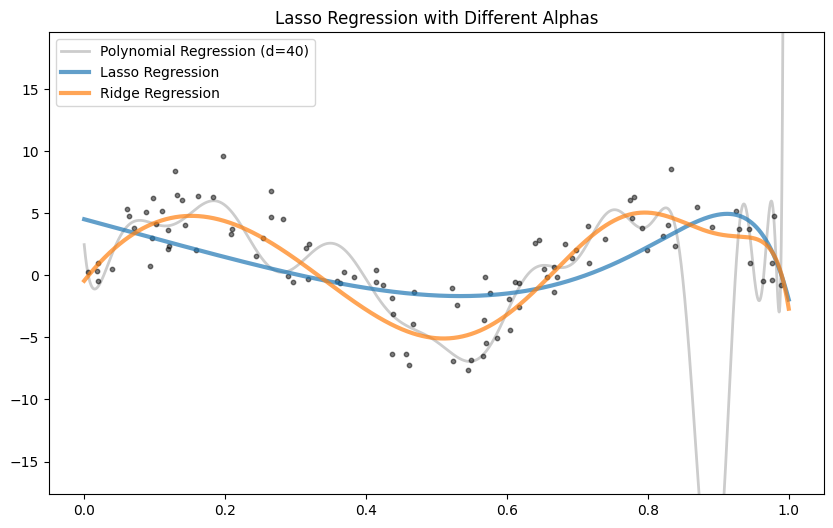

In [4]:
plt.figure(figsize=(10, 6))

plt.scatter(X, y, color="black", s=10, alpha=0.5)

model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(x_plot)
plt.plot(x_plot, y_pred, color="black", label=f"Polynomial Regression (d={degree})" , alpha=0.2, linewidth=2)

lasso_model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Lasso(0.1,max_iter=10000))
lasso_model.fit(X_train, y_train)
y_lasso = lasso_model.predict(x_plot)
plt.plot(x_plot, y_lasso, label=f"Lasso Regression",alpha=0.7, linewidth=3)

ridge_model = make_pipeline(PolynomialFeatures(degree),StandardScaler(), Ridge(0.0001))
ridge_model.fit(X_train, y_train)
y_ridge = ridge_model.predict(x_plot)
plt.plot(x_plot, y_ridge, label=f"Ridge Regression", alpha=0.7, linewidth=3)

pad = 10
plt.title("Lasso Regression with Different Alphas")
plt.ylim(y.min()-pad, y.max()+pad)
plt.legend()
plt.show()

In the following example Ridge Regression works best at approximating the sin function, since the function is non polynomial. 

In [5]:
# Synthetic interaction data
np.random.seed(42)
n_samples = 100
X = np.random.uniform(-5, 5, size=(n_samples, 1))
y_true = 0.3 * X[:,0] * X[:,0] * X[:,0]
y = y_true + np.random.normal(scale=6.0, size=n_samples)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Fit polynomial regression with high degree
degree = 40
x_plot = np.linspace(-5, 5, 1000).reshape(-1, 1)

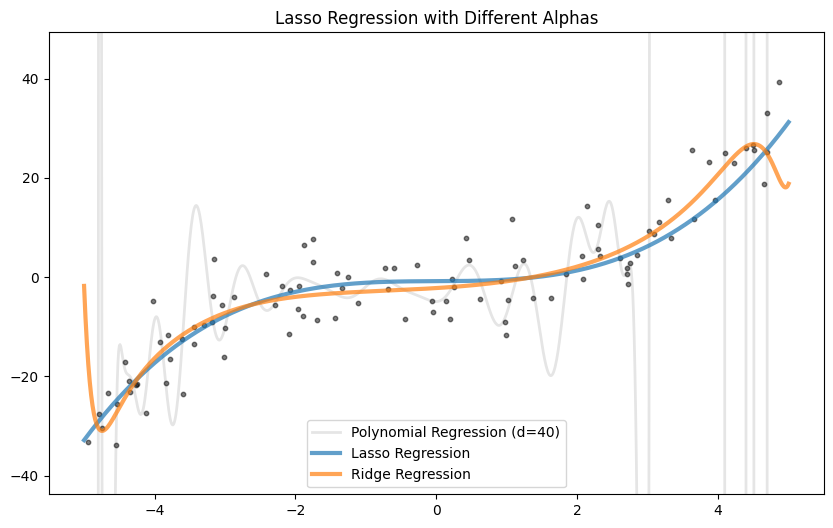

In [6]:
plt.figure(figsize=(10, 6))

plt.scatter(X, y, color="black", s=10, alpha=0.5)

model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(x_plot)
plt.plot(x_plot, y_pred, color="black", label=f"Polynomial Regression (d={degree})" , alpha=0.1, linewidth=2)

lasso_model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Lasso())
lasso_model.fit(X_train, y_train)
y_lasso = lasso_model.predict(x_plot)
plt.plot(x_plot, y_lasso, label=f"Lasso Regression", alpha=0.7, linewidth=3)

ridge_model = make_pipeline(PolynomialFeatures(degree),StandardScaler(), Ridge())
ridge_model.fit(X_train, y_train)
y_ridge = ridge_model.predict(x_plot)
plt.plot(x_plot, y_ridge, label=f"Ridge Regression", alpha=0.7, linewidth=3)

pad = 10
plt.title("Lasso Regression with Different Alphas")
plt.ylim(y.min()-pad, y.max()+pad)
plt.legend()
plt.show()

In the case of this function lasso regularization works best, as it selects the relevent feature to model the function $y = 0.3 * x^3$

So **Ridge** prevents coefficients from exploding, but keeps all of them. Usefull when you suspect many features to be useful (dense solution). Or when features are **highly correlated**.

**Lasso** performs **feature selection** by setting some coefficients to zero But it can behave erratically when features are **highly correlated** — arbitrarily picking one and ignoring the others.

### Elastic Net

**Elastic Net** combines Ridge and Lasso, giving you the **stability of Ridge** and the **sparsity of Lasso**.

$$
\text{Loss} = \text{RSS} + \alpha \cdot \left[ \rho \cdot \sum |w_i| + (1 - \rho) \cdot \sum w_i^2 \right]
$$

* $\alpha$: overall regularization strength.
* $\rho$ (or `l1_ratio` in scikit-learn): mix between Lasso ($\ell_1$) and Ridge ($\ell_2$).


It is usefull, when you have **many correlated features**, but you want **sparsity**. 

In [182]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target
longitude = X[:, data.feature_names.index('Longitude')]
latitude = X[:, data.feature_names.index('Latitude')]

# Define degree and pipelines
degree = 5
lasso = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LassoCV(n_jobs=8))
ridge = make_pipeline(PolynomialFeatures(degree), StandardScaler(), RidgeCV())
elastic = make_pipeline(PolynomialFeatures(degree), StandardScaler(), ElasticNetCV(n_jobs=8, l1_ratio=[0.1, 0.3, 0.5, 0.7 ,0.9]))

# Train models
lasso.fit(X, y)
ridge.fit(X, y)
elastic.fit(X, y)

/home/lukas/.local/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5433062121883268, tolerance: 2.1101747091944913
  model = cd_fast.enet_coordinate_descent_gram(
/home/lukas/.local/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.1048278594826115, tolerance: 2.1101747091944913
  model = cd_fast.enet_coordinate_descent_gram(
/home/lukas/.local/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6362417458694836, tolerance: 2.2281819245648817
  model = cd_fast.enet_coordinate_descent_gram(
/home/lukas/.local/lib/python3.13/site-packages/sklearn/linear_model/_coo

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9], n_jobs=8))])

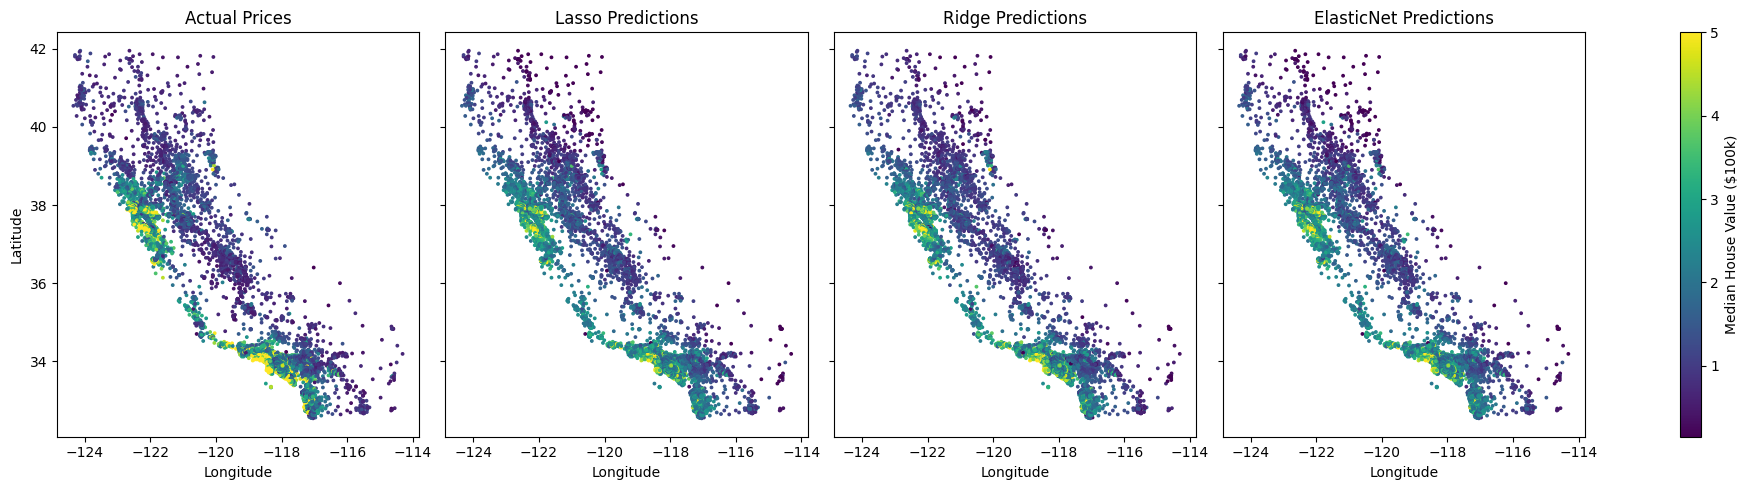

In [196]:
# Predict
pred_lasso = lasso.predict(X)
pred_ridge = ridge.predict(X)
pred_elastic = elastic.predict(X)

# Set color scale range
vmin = y.min()
vmax = y.max()

# Create 2x2 plot grid
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

# Plot each on a shared color scale
sc0 = axes[0].scatter(longitude, latitude, c=y, cmap='viridis', vmin=vmin, vmax=vmax, s=3)
axes[0].set_title("Actual Prices")

axes[1].scatter(longitude, latitude, c=pred_lasso, cmap='viridis', vmin=vmin, vmax=vmax, s=3)
axes[1].set_title("Lasso Predictions")

axes[2].scatter(longitude, latitude, c=pred_ridge, cmap='viridis', vmin=vmin, vmax=vmax, s=3)
axes[2].set_title("Ridge Predictions")

axes[3].scatter(longitude, latitude, c=pred_elastic, cmap='viridis', vmin=vmin, vmax=vmax, s=3)
axes[3].set_title("ElasticNet Predictions")

# Shared axis labels
for ax in axes.flat:
    ax.set_xlabel("Longitude")

axes[0].set_ylabel("Latitude")
plt.tight_layout()
# Single shared colorbar
cbar = fig.colorbar(sc0, ax=axes.ravel().tolist())
cbar.set_label("Median House Value ($100k)")
plt.show()

In [184]:
from sklearn.metrics import mean_squared_error

pred_lasso = lasso.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_elastic = elastic.predict(X_test)

# Calculate MSE
mse_lasso = mean_squared_error(y_test, pred_lasso)
mse_ridge = mean_squared_error(y_test, pred_ridge)
mse_elastic = mean_squared_error(y_test, pred_elastic)

# Print MSE values
print(f"Lasso MSE: {mse_lasso:.4f}")
print(f"Ridge MSE: {mse_ridge:.4f}")
print(f"ElasticNet MSE: {mse_elastic:.4f}")

Lasso MSE: 0.4795
Ridge MSE: 0.3778
ElasticNet MSE: 0.4766
